In [2]:
from google.colab import files
files.upload()
# check to see if the file is there
!ls -lha kaggle.json
# install Kaggle API
!pip install kaggle --upgrade
# move file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change permissions
!chmod 600 ~/.kaggle/kaggle.json
# download dataset 
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech
#unzip dataset
!unzip twitter-sentiment-analysis-hatred-speech.zip

Saving kaggle.json to kaggle (1).json
-rw-r--r-- 1 root root 64 Jan 17 01:04 kaggle.json
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)
twitter-sentiment-analysis-hatred-speech.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  twitter-sentiment-analysis-hatred-speech.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
import pandas as pd
import numpy as np
training= pd.read_csv('train.csv', sep=',')
training.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
validation = pd.read_csv('test.csv', sep = ',')
validation.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [5]:
import re

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [25]:
training['tweet'] = np.vectorize(remove_pattern)(training['tweet'], "@[\w]*")
training['tweet'] = training['tweet'].str.replace("[^a-zA-Z#]", " ")
training['tweet'] = training['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [26]:
validation['tweet'] = np.vectorize(remove_pattern)(validation['tweet'], "@[\w]*")
validation['tweet'] = validation['tweet'].str.replace("[^a-zA-Z#]", " ")
validation['tweet'] = validation['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
training.head(10)

,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty
3,4,0,#model love take with time
4,5,0,factsguide society #motivation
5,6,0,huge fare talking before they leave chaos disp...
6,7,0,camping tomorrow danny
7,8,0,next school year year exams think about that #...
8,9,0,love land #allin #cavs #champions #cleveland #...
9,10,0,welcome here


In [18]:
validation.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone #birds #mov...
2,31965,safe ways heal your #acne #altwaystoheal #heal...
3,31966,cursed child book reservations already where w...
4,31967,#bihday amazing hilarious #nephew ahmir uncle ...
5,31968,choose #momtips
6,31969,something inside dies eyes ness #smokeyeyes #t...
7,31970,#finished#tattoo#inked#ink#loveit #thanks#aleeee
8,31971,will never understand left when young #deep #i...
9,31972,#delicious #food #lovelife #capetown mannaepic...


In [19]:
#select relavant columns
train_text = training['tweet']
train_labels = training['label']
val_text = validation['tweet']
#val_labels= validation['label']
print((train_text.shape,train_labels.shape),(val_text.shape))

((31962,), (31962,)) (17197,)


In [34]:
hate_tweet = training[training.label == 1]
non_hate_tweet = training[training.label == 0]

In [35]:
import matplotlib.pyplot as plt

def wordcloud_generator(tweet_type):
  neg_string = []
  for t in tweet_type.tweet:
      neg_string.append(t)
  neg_string = pd.Series(neg_string).str.cat(sep=' ')
  from wordcloud import WordCloud
  wordcloud = WordCloud(width=1600, height=800,max_font_size=300).generate(neg_string)
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

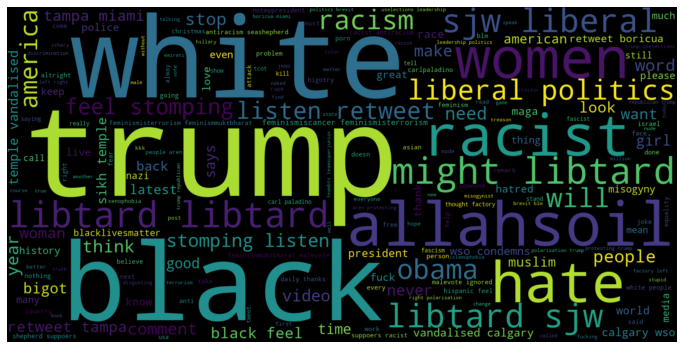

In [36]:
wordcloud_generator(hate_tweet)

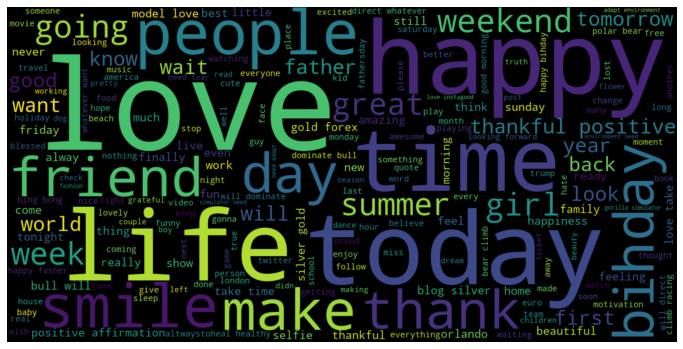

In [37]:
wordcloud_generator(non_hate_tweet)

In [38]:
import tensorflow_hub as hub
import tensorflow as tf
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_text[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.14808416, -0.20216864, -0.32765266, -0.18243363,  0.11220028,
         0.16373754,  0.05628956, -0.22185096, -0.0747824 ,  0.18737426,
         0.16179842, -0.07205924, -0.00330262,  0.22917822, -0.3224408 ,
        -0.12975734,  0.19206089, -0.13658376,  0.00103353, -0.0485791 ,
         0.07119115,  0.06768534,  0.16105083, -0.1406542 ,  0.10837235,
         0.3301314 , -0.26210815, -0.06247202,  0.29410827, -0.07544945,
        -0.1321843 , -0.02131046,  0.04966639,  0.03409505, -0.27257788,
        -0.08586751,  0.2726697 ,  0.05651699, -0.21940647, -0.25224274,
         0.31677127, -0.04545145,  0.0384911 , -0.12849973,  0.13988742,
         0.08590916,  0.13431183, -0.01103316,  0.07414539, -0.41209972],
       [ 0.14021808, -0.16118526, -0.0319198 , -0.2634714 ,  0.0893983 ,
         0.05663258,  0.25570166,  0.2685329 , -0.27488115, -0.13529268,
        -0.09451762,  0.23651737, -0.02535236, -0.06197646, -0.12810369,
 

In [39]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

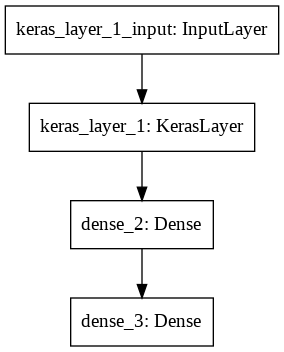

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [42]:
history = model.fit(train_text,train_labels,validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
899/899 [==============================] - 26s 29ms/step - loss: 0.2718 - accuracy: 0.9342 - val_loss: 0.1379 - val_accuracy: 0.9509
Epoch 2/10
899/899 [==============================] - 26s 29ms/step - loss: 0.0819 - accuracy: 0.9711 - val_loss: 0.1428 - val_accuracy: 0.9531
Epoch 3/10
899/899 [==============================] - 26s 29ms/step - loss: 0.0429 - accuracy: 0.9858 - val_loss: 0.1755 - val_accuracy: 0.9531
Epoch 4/10
899/899 [==============================] - 26s 29ms/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.2153 - val_accuracy: 0.9525
Epoch 5/10
899/899 [==============================] - 26s 29ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.2585 - val_accuracy: 0.9543
Epoch 6/10
899/899 [==============================] - 26s 29ms/step - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.3067 - val_accuracy: 0.9506
Epoch 7/10
899/899 [==============================] - 26s 29ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.3504 - val_accuracy:

In [43]:
#mount to google drive so we can save our model there
from google.colab import drive
drive.mount('/content/drive')
path = path = F"/content/drive/My Drive/Model_for_TwitterHateSpeechSentimentAnalysis" 

Mounted at /content/drive


In [44]:
model.save(path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Model_for_TwitterHateSpeechSentimentAnalysis/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Model_for_TwitterHateSpeechSentimentAnalysis/assets


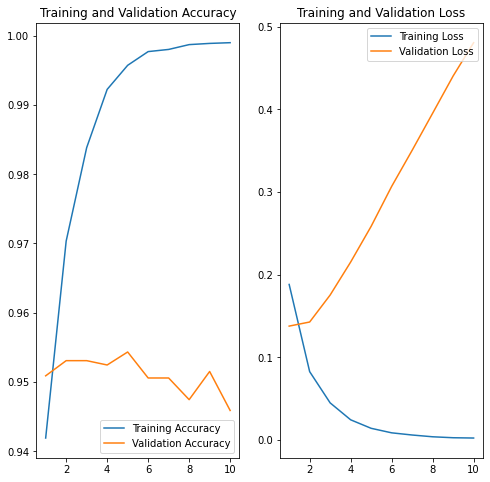

In [45]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#The next box contains VERY HATEFUL language! Please proceed at your own risk.

In [50]:
def print_my_examples(inputs, results):
  result_for_printing = [f'input: {inputs[i]:<30} : score: {((results[i][0])*100)}'
  for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'fuck blacks',  # this is the same sentence tried earlier
    'i love everyone!',
    'jews are a virus that need to be burned',
    'the file wont download',
    'white supremacists are in the right'
]

reloaded_results = tf.sigmoid(model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)

Results from the saved model:
input: fuck blacks                    : score: 99.98470306396484
input: i love everyone!               : score: 5.936634579484235e-07
input: jews are a virus that need to be burned : score: 97.87150573730469
input: the file wont download         : score: 0.04582208767533302
input: white supremacists are in the right : score: 94.02477264404297

